<a href="https://colab.research.google.com/github/nitinpalla/AIML/blob/main/BankChurnprediction_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
! pip install scikeras
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Networks/Submission Project/Churn.csv')

## Data Overview

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Understanding the shape of the dataset


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

#### Univariate Analysis



In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

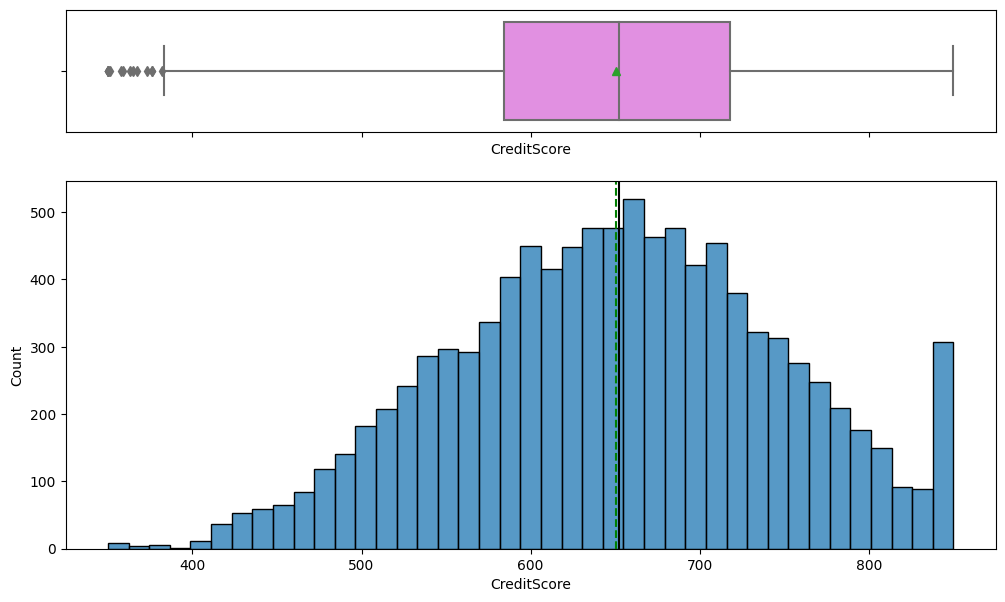

In [ ]:
histogram_boxplot(data,'CreditScore')

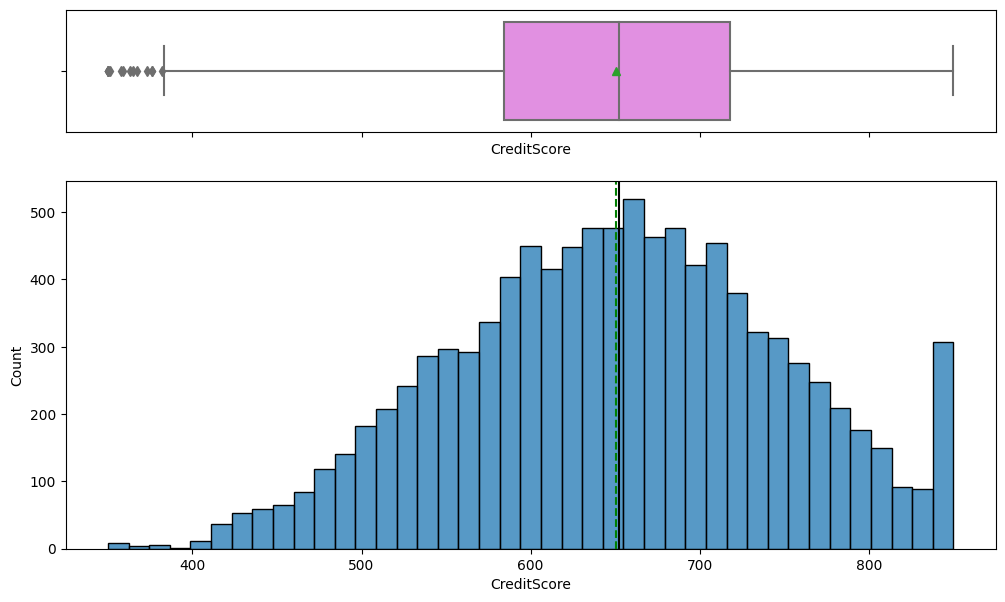

In [ ]:
# Observations on CreditScore
histogram_boxplot(data, 'CreditScore')


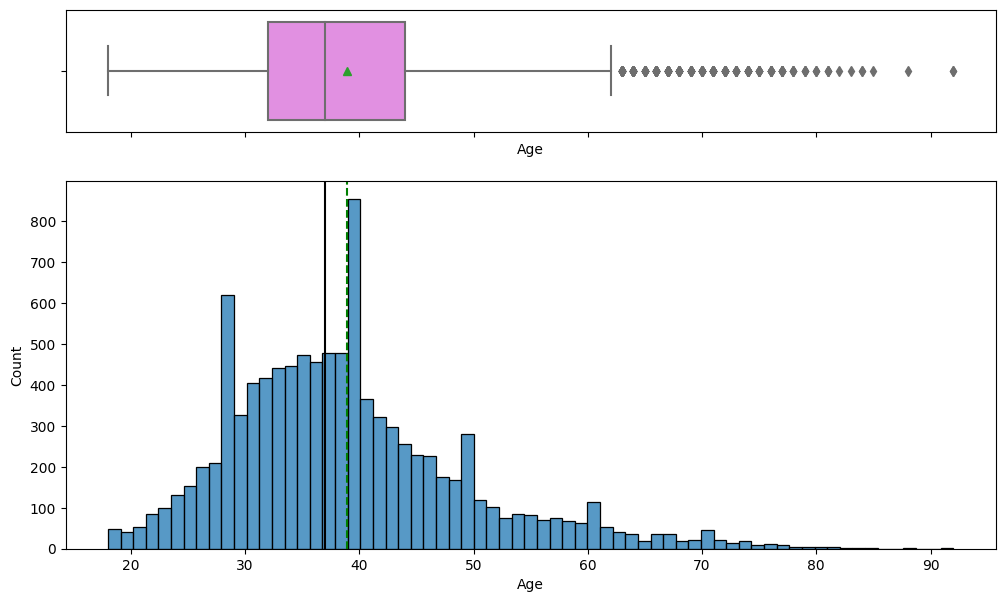

In [ ]:

# Observations on Age
histogram_boxplot(data, 'Age')


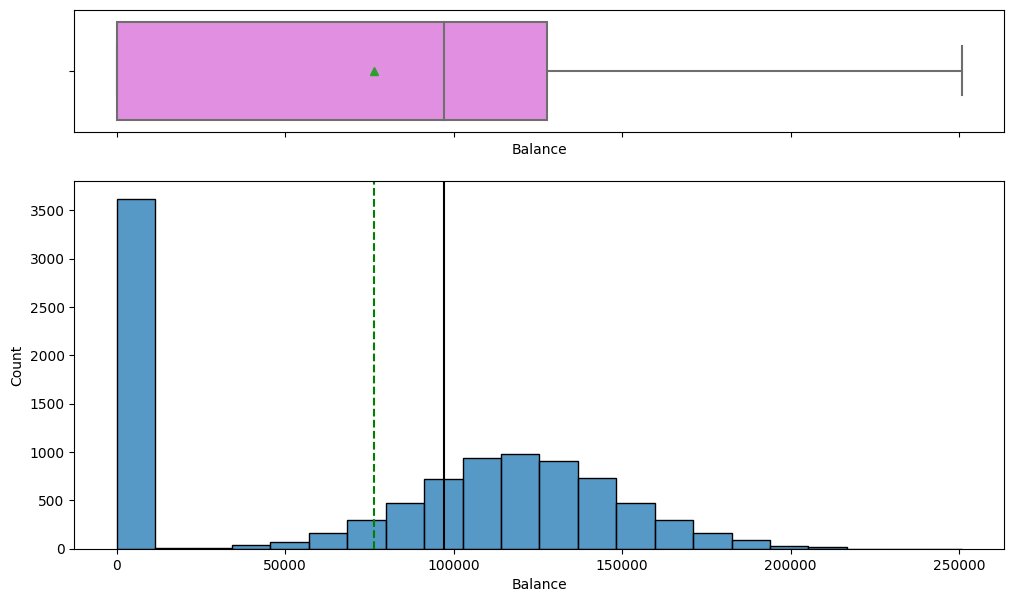

In [ ]:

# Observations on Balance
histogram_boxplot(data, 'Balance')



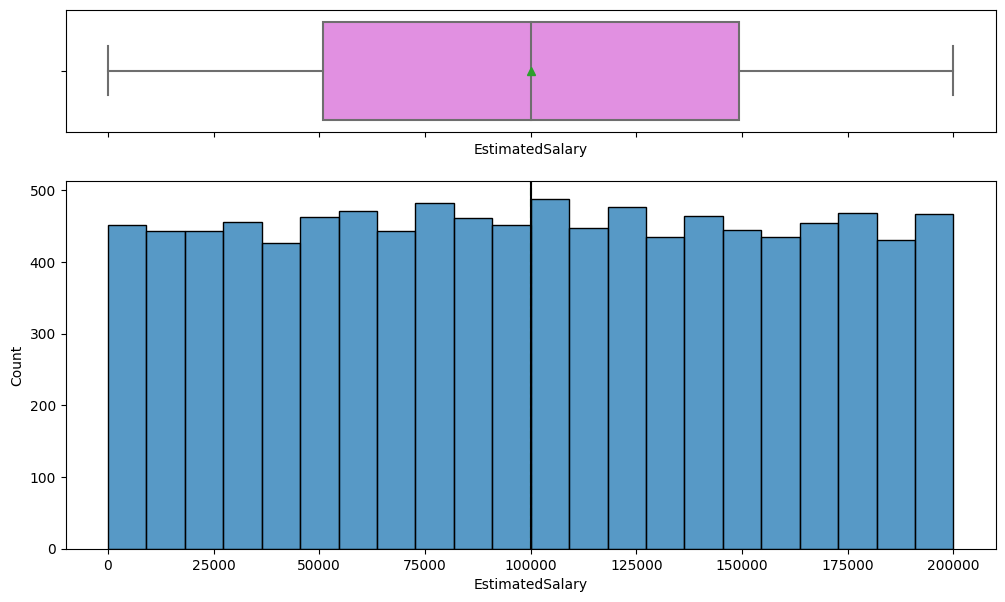

In [ ]:
# Observations on Estimated Salary
histogram_boxplot(data, 'EstimatedSalary')

<Axes: xlabel='IsActiveMember', ylabel='count'>

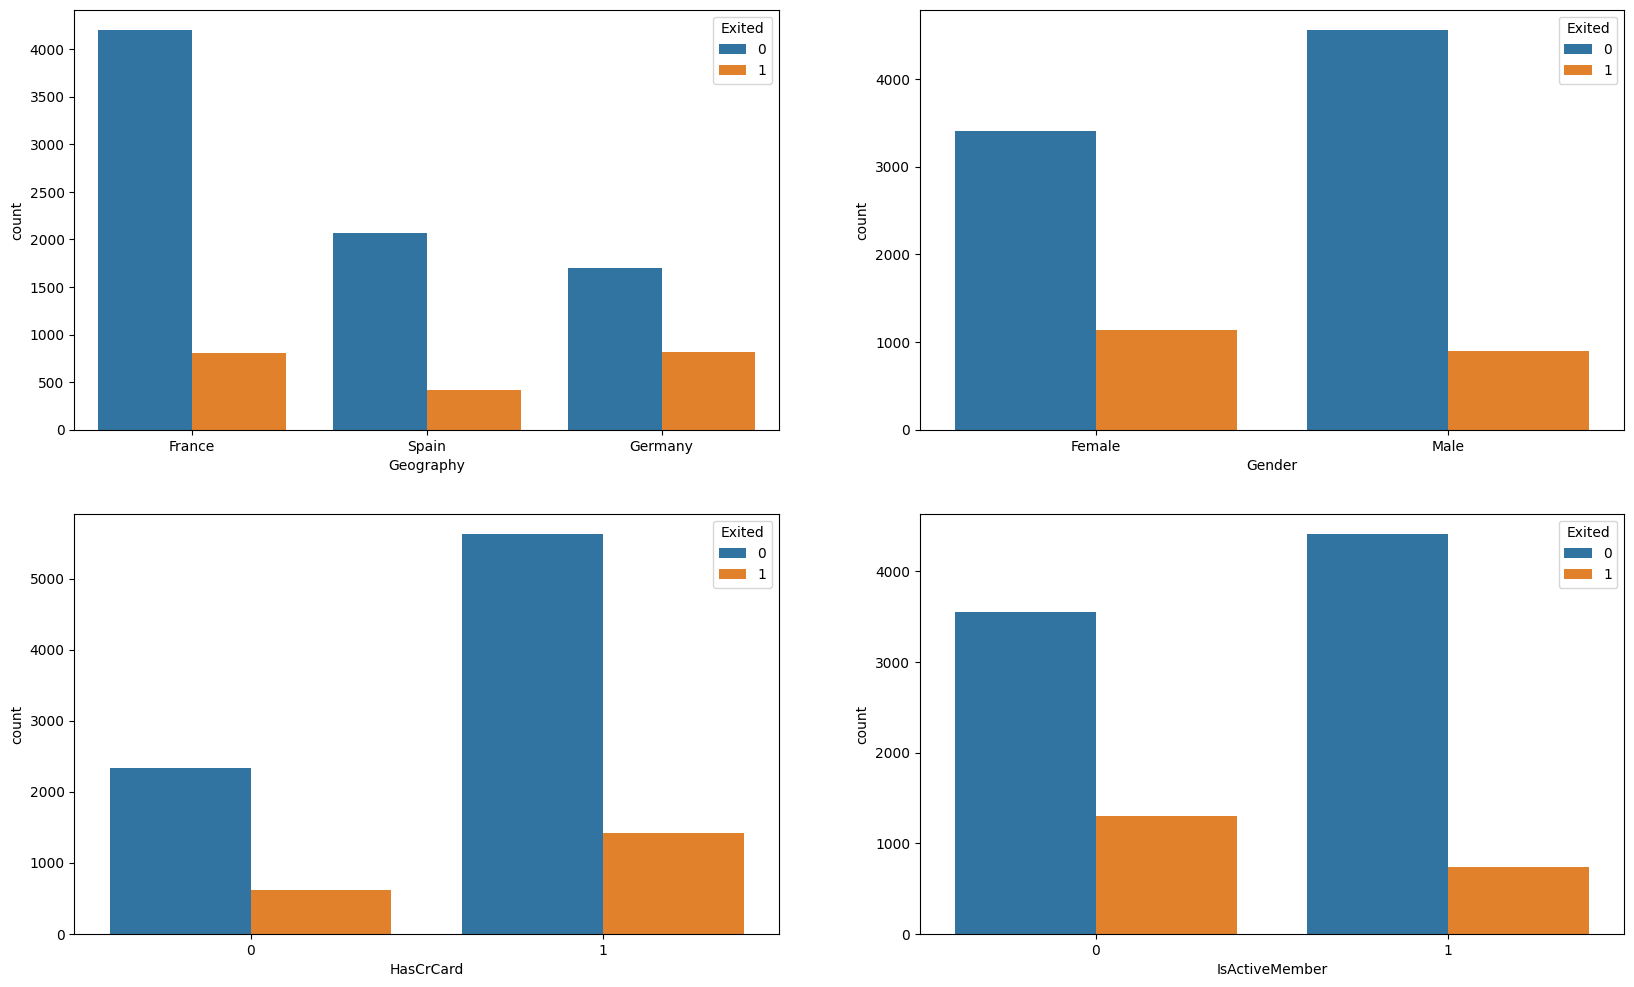

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

We note the following:

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

* The proportion of female customers churning is also greater than that of male customers


Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

* Unsurprisingly the inactive members have a greater churn.

Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn

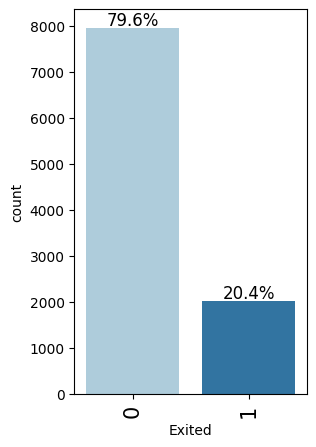

In [ ]:
# Observations on Exited
labeled_barplot(data, "Exited", perc=True)

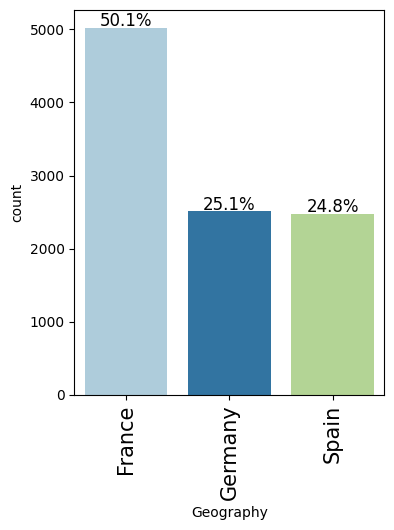

In [ ]:
# Observations on Geography
labeled_barplot(data, "Geography", perc=True)

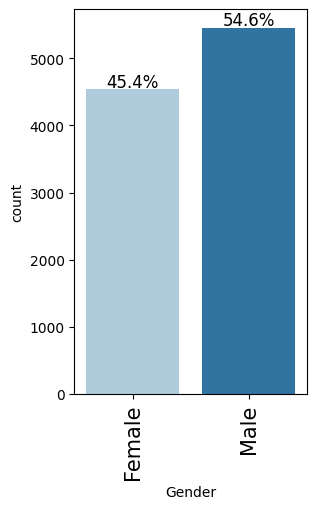

In [ ]:
# Observations on Gender
labeled_barplot(data, "Gender", perc=True)

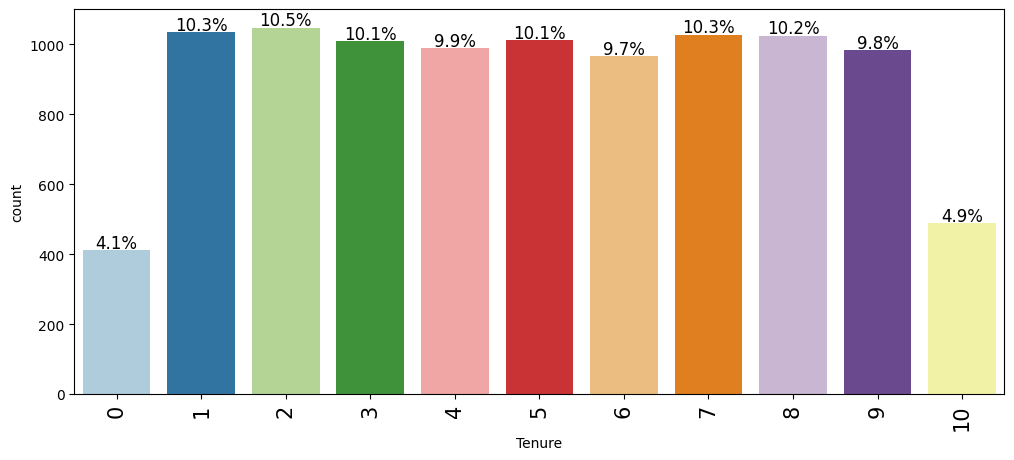

In [ ]:
# Observations on Tenure
labeled_barplot(data, "Tenure", perc=True)

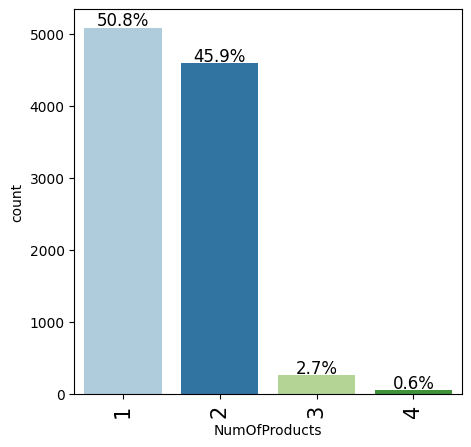

In [ ]:
# Observations on Number of Products
labeled_barplot(data, "NumOfProducts", perc=True)

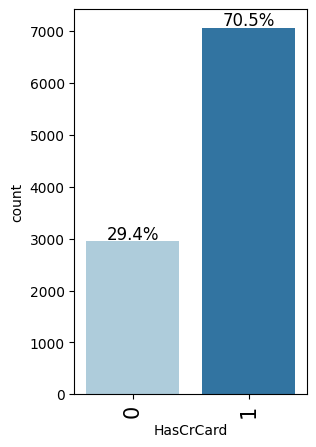

In [ ]:
# Observations on Has Credit Card
labeled_barplot(data, "HasCrCard", perc=True)

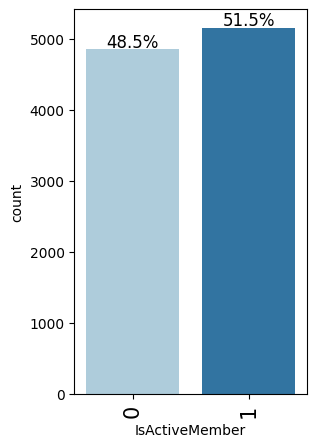

In [ ]:
# Observations on Is Active Member
labeled_barplot(data, "IsActiveMember", perc=True)

**Insights**:

* No correlation observed between the columns

* Exited Customers seem to be distributed across all Credit Scores

* Lot of Customers customers aged between 40-60 seem to have exited the bank

* Lot of customers with 3-4 products seem to have exited the bank

* Customers with or without credit cards seem to have exited the bank

* Lot of customers who are non active members seem to have exited the bank

* Customers across all Estimated Salaries seem to have exited the bank uniformly

#### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

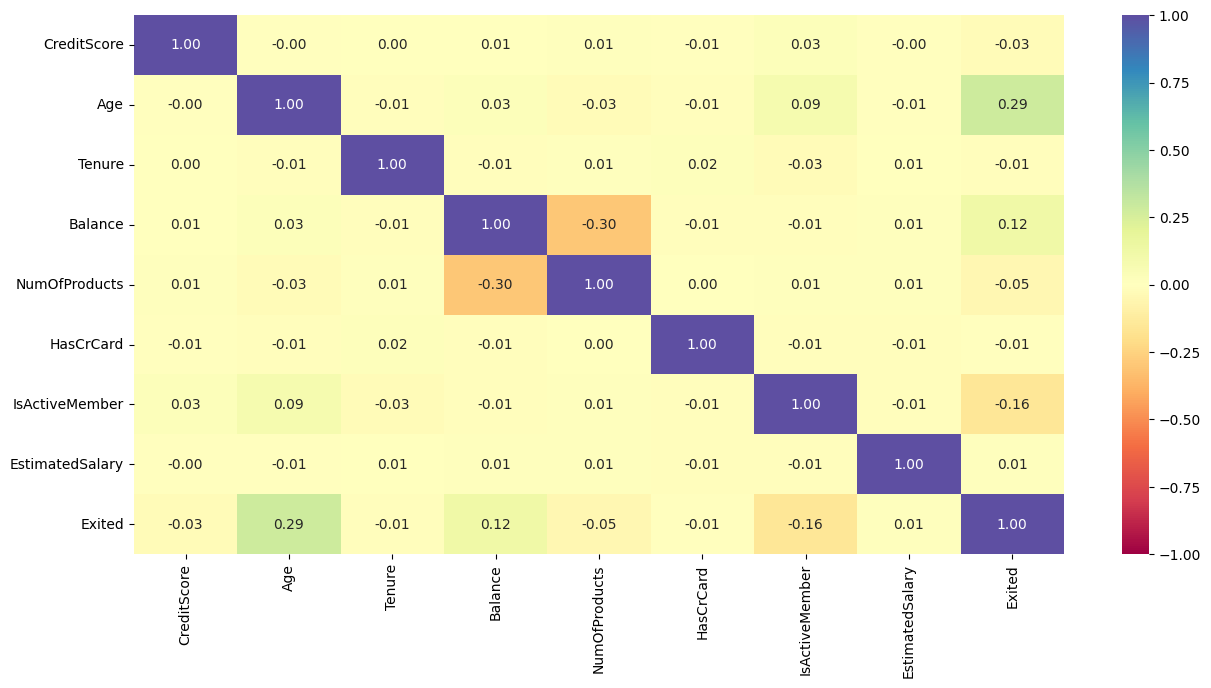

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


**Insights**: None of the columns are strongly corelated with each other. There is no multicollinearity.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


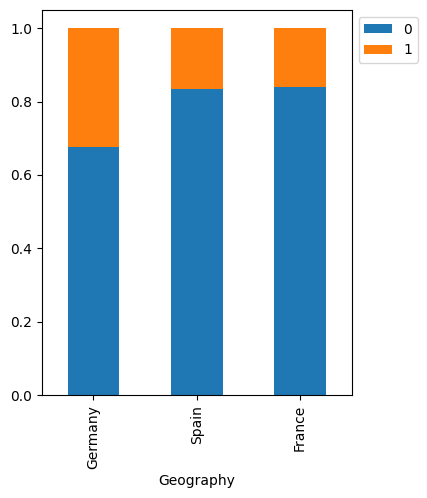

In [ ]:
# Exited Vs Geography
stacked_barplot(data, "Geography", "Exited")

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


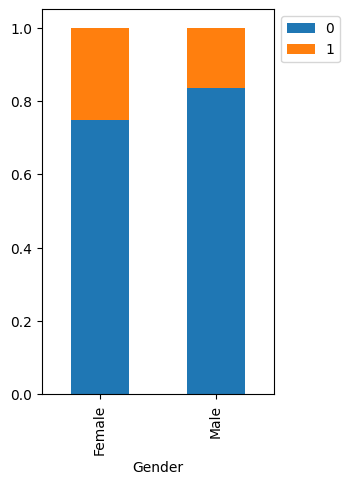

In [ ]:
# Exited Vs Gender (assuming you want "Gender" as the next predictor based on the provided order)
stacked_barplot(data, "Gender", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


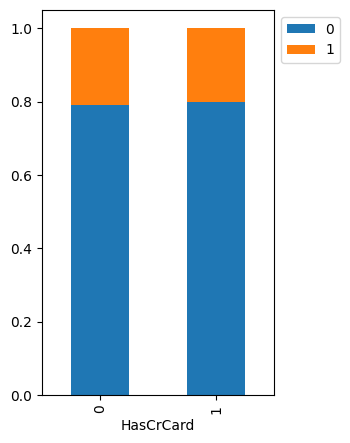

In [ ]:
# Exited Vs Has Credit Card
stacked_barplot(data, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


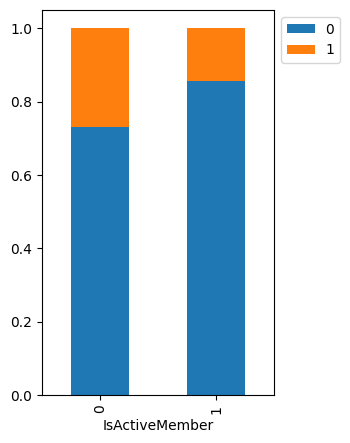

In [ ]:
# Exited Vs Is Active Member
stacked_barplot(data, "IsActiveMember", "Exited")


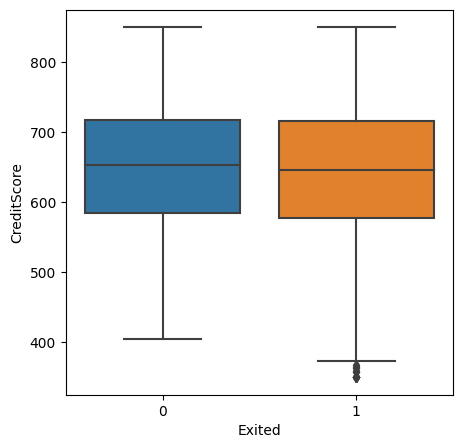

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()

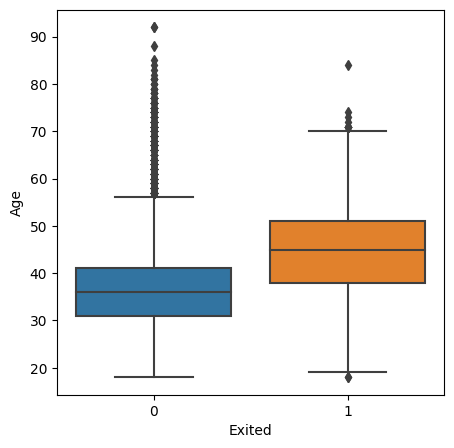

In [ ]:
# Exited Vs Age
plt.figure(figsize=(5,5))
sns.boxplot(y='Age', x='Exited', data=data)
plt.show()

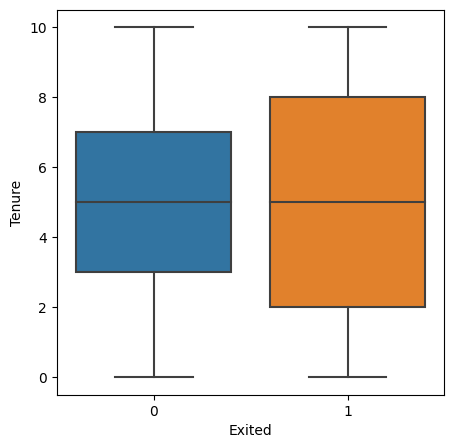

In [ ]:
# Exited Vs Tenure
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure', x='Exited', data=data)
plt.show()

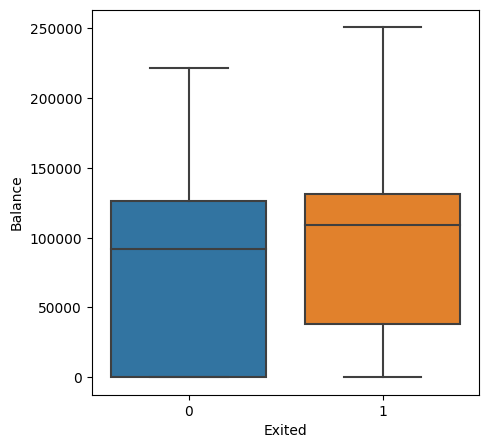

In [ ]:
# Exited Vs Balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance', x='Exited', data=data)
plt.show()

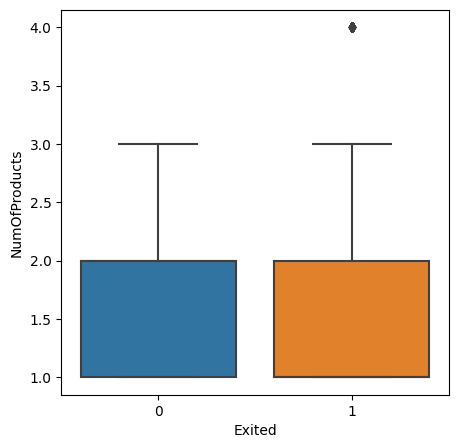

In [ ]:
# Exited Vs Number of Products
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts', x='Exited', data=data)
plt.show()

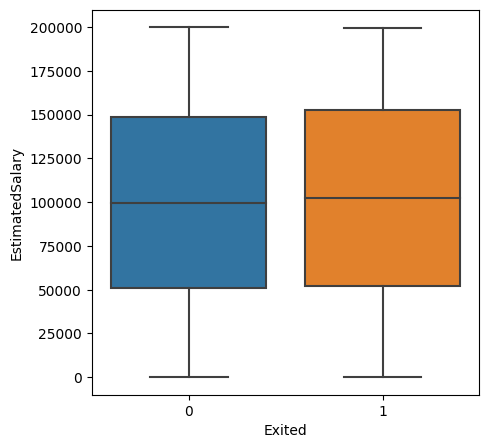

In [ ]:
# Exited Vs Estimated Salary
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary', x='Exited', data=data)
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Data Preparation for Modeling
X = data.drop(['Exited'], axis=1)  # Independent features
y = data[['Exited']]  # Dependent/target feature

In [ ]:

# Splitting the dataset into a large set and a testing set
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [ ]:
# Splitting the large set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=0.2, random_state=42, stratify=y_large, shuffle=True)

In [ ]:
# Create dummy variables for string type variables
# Encoding Geography and Gender variables
X_train = pd.get_dummies(X_train, columns=["Geography", "Gender"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography", "Gender"], drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography", "Gender"], drop_first=True)

In [ ]:
# Normalize the numerical data
sc = StandardScaler()
columns_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
temp = sc.fit(X_train[columns_to_scale])
X_train[columns_to_scale] = temp.transform(X_train[columns_to_scale])
X_test[columns_to_scale] = temp.transform(X_test[columns_to_scale])
X_val[columns_to_scale] = temp.transform(X_val[columns_to_scale])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as**:
* Predicting a customer is exiting and the customer is not exiting
* Predicting a customer is not exiting and customer is exiting

**Which case is more important** ?
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.



> Create a function for plotting the confusion matrix

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()

# Add the input layer with 64 neurons, ReLU activation, and input of 11 variables
classifier.add(Dense(activation='relu', input_dim=11, units=64))

# Add the 1st hidden layer with 32 neurons and ReLU activation
classifier.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model with SGD optimizer, binary cross-entropy loss, and accuracy metric
classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Obtain the summary of the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model on train data for 100 epochs
history = classifier.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 3s 8ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

* Loss Function

63/63 [==============================] - 0s 1ms/step - loss: 0.3465 - accuracy: 0.8570


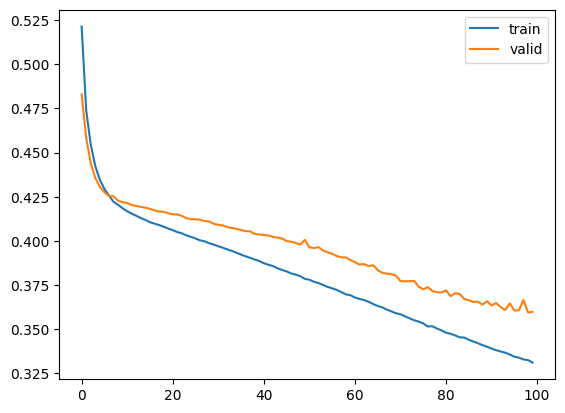

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Evaluate the model on X_test and y_test
results = classifier.evaluate(X_test, y_test)

63/63 [==============================] - 0s 772us/step


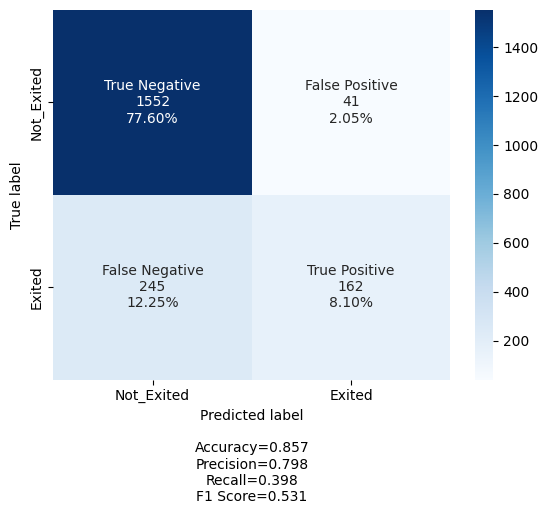

In [ ]:
# Confusion matrix

# Obtain predictions on X_val
y_pred1 = classifier.predict(X_test)

# Predict using default threshold
y_pred1 = (y_pred1 > 0.5)

# Compute the confusion matrix
cm2 = confusion_matrix(y_test, y_pred1)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited', 'Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


The above model exhibits commendable accuracy and precision, yet falters in recall. This could stem from two factors:


1.   **Dataset Imbalance**: From our exploratory data analysis, it's evident that the dataset leans towards the non_exited class (0).

2.   **Decision Threshold**: Given the imbalance in the dataset, utilizing ROC-AUC can help pinpoint the optimal threshold for predictions.

To rectify this, we should adjust the decision threshold, employ SMOTE for data balancing, and finetune other relevant hyperparameters. Additionally, considering the noise observed in the validation loss, switching the optimizer from SGD to Adam might be beneficial.

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
    # Initializing the neural network
    model = Sequential()

    # Add the input layer with 64 neurons and ReLU activation
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

    # Add the first hidden layer with 32 neurons and ReLU activation
    model.add(Dense(32, activation='relu'))

    # Add the output layer with 1 neuron and sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    # Initialize the Adam optimizer with a learning rate of 0.001
    optimizer = tf.keras.optimizers.Adam(0.001)

    # Compile the model with binary cross-entropy as loss and accuracy as the metric
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model on train data
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4177 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8327 - val_loss: 0.4077 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8356 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8403 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3878 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8469

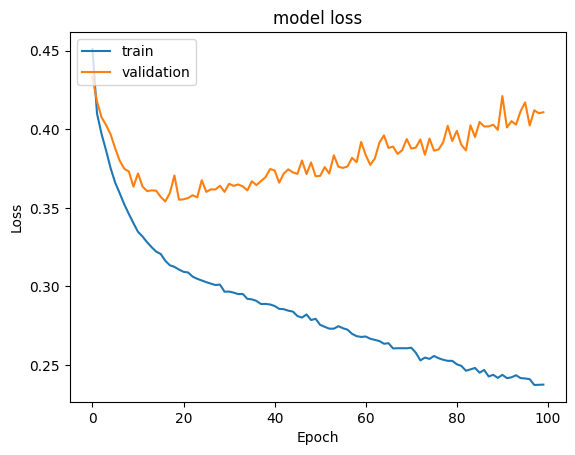

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



> The model is overfitting due to its many parameters, so implementing early stopping is advisable.

> Early stopping halts model training when validation performance no longer improves, providing a regularized model with good generalization.


### Model Improvement: Neural Network model with Dropout

In [ ]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Call the create_model() function to instantiate a model
model_e = create_model()

# Train the model on X_train and y_train for 100 epochs
history_e = model_e.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8413 - val_loss: 0.3870 - val_accuracy: 0.8394
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8462 - val_loss: 0.3741 - val_accuracy: 0.8481
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8520 - val_loss: 0.3685 - val_accuracy: 0.8444

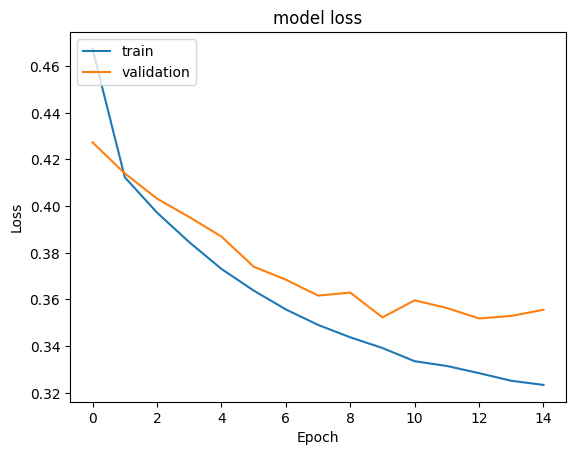

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

To optimize the balance between false positive and true positive rates using ROC-AUC, we can find the threshold that maximizes the Geometric Mean (G-Mean) of Sensitivity (True Positive Rate) and Specificity (1 - False Positive Rate).

200/200 [==============================] - 0s 928us/step
Best Threshold=0.167119, G-Mean=0.802


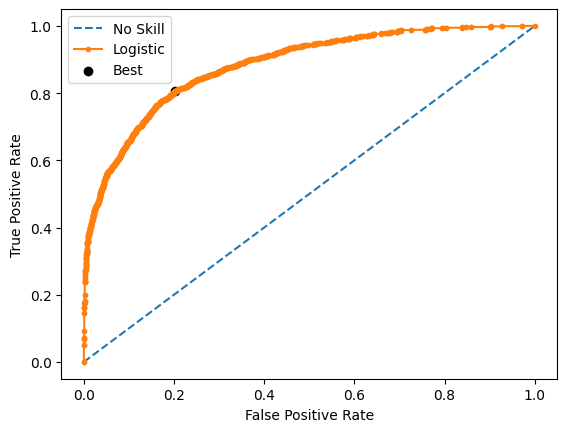

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
cr = metrics.classification_report(y_val, y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



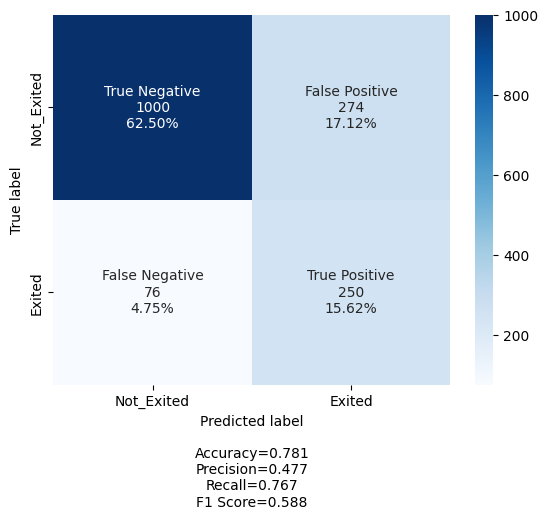

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


From the above confusion matrix, we can observe that the accuracy and recall are the same, but this model is not overfitting like the previous model. Let's try hyperparameter tuning to get a better model and metrics using GridSearchCV

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_3 = Sequential()

# Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Adding dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8, activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation='sigmoid'))


In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

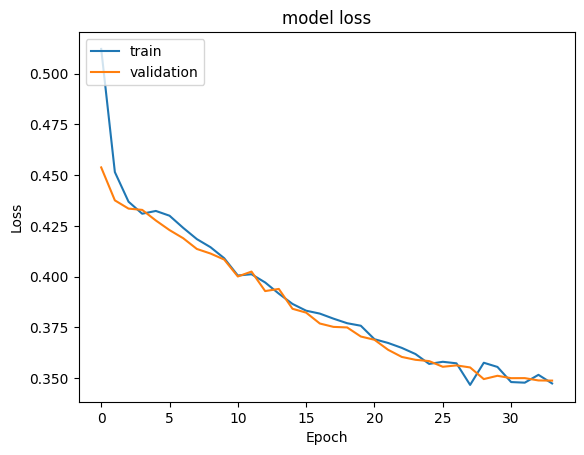

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.220601, G-Mean=0.793


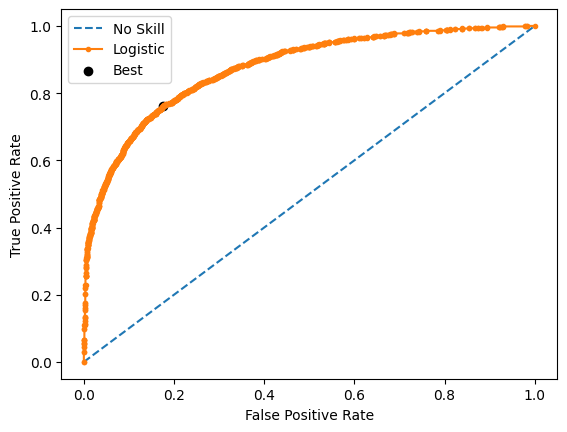

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
cr = metrics.classification_report(y_val, y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1274
           1       0.51      0.75      0.61       326

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



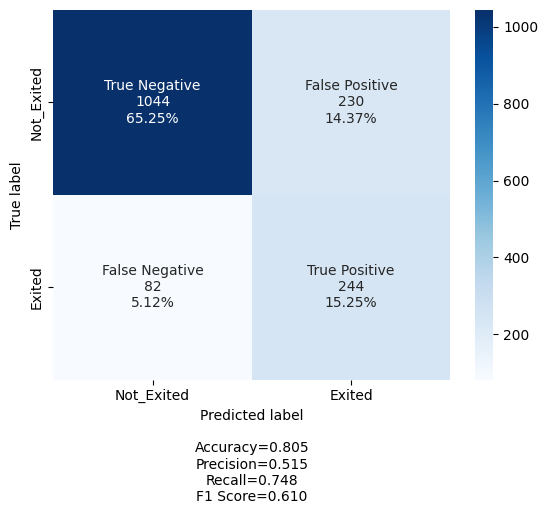

In [ ]:
cm1 = confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


### Model Improvement: Neural Network model with balanced data

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    # Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Use the passed dropout_rate
    model.add(Dropout(dropout_rate))

    # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model


we're optimizing only the batch size and epochs using grid search, though other hyperparameters can also be tuned.

In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v2, lr=0.001, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]
}

kfold_splits = 3

# Use the keras_estimator as the estimator in the GridSearchCV
grid = GridSearchCV(estimator=keras_estimator,
                    param_grid=param_grid,
                    verbose=1,
                    cv=kfold_splits,
                    n_jobs=-1)


In [ ]:
# Fit the model using the training data and use the validation data for validation
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']


Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 1s 3ms/step - loss: 0.4353 - accuracy: 0.8120 - val_loss: 0.4193 - val_accuracy: 0.8281
Best: 0.819531 using {'batch_size': 40, 'lr': 0.01}


* Best model is with the following configuration: ( It may vary each time code runs )

Result of Grid Search:

> {'batch_size': 40, 'learning_rate":0.01}

Heuristic for Hyperparameters:

> optimizer="adam", layer1_units=64, layer2_units = 32

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model on train data and train the model with best batch_size obtained from hyperparameter tuning
history_h = estimator_v2.fit(X_train, y_train, epochs=100,
                             batch_size=grid_result.best_params_['batch_size'],
                             verbose=1, validation_data=(X_val, y_val))


Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.8087 - val_loss: 0.4265 - val_accuracy: 0.8163
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8313 - val_loss: 0.4065 - val_accuracy: 0.8325
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8391 - val_loss: 0.3938 - val_accuracy: 0.8381
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8456 - val_loss: 0.3723 - val_accuracy: 0.8400
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8533 - val_loss: 0.3719 - val_accuracy: 0.8475
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8544 - val_loss: 0.3620 - val_accuracy: 0.8537
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8555 - val_loss: 0.3588 - val_accuracy: 0.8531

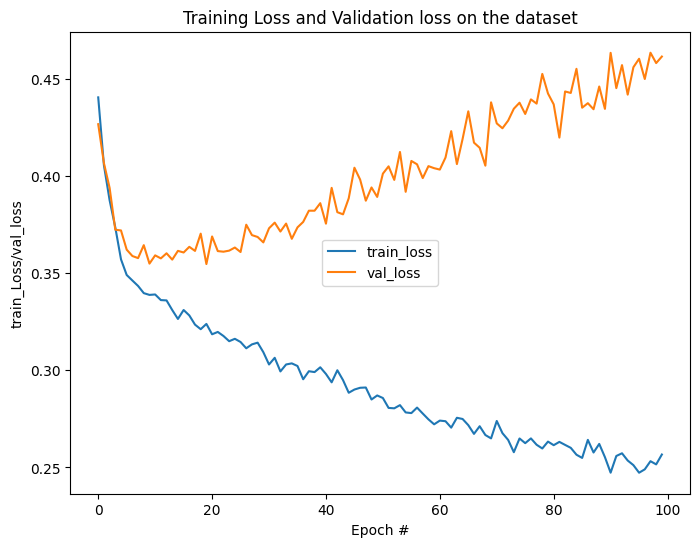

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

200/200 [==============================] - 0s 946us/step
Best Threshold=0.197868, G-Mean=0.875


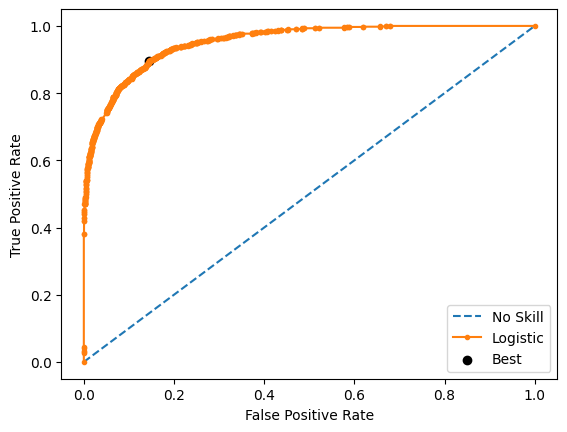

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
y_pred_h = estimator_v2.predict(X_test)
print(y_pred_h)


63/63 [==============================] - 0s 1ms/step
[[1.6772550e-02]
 [6.1737053e-02]
 [1.5838431e-02]
 ...
 [8.9759701e-01]
 [6.8556823e-05]
 [1.4008454e-02]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
cr = metrics.classification_report(y_test, y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1593
           1       0.46      0.70      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.78      2000



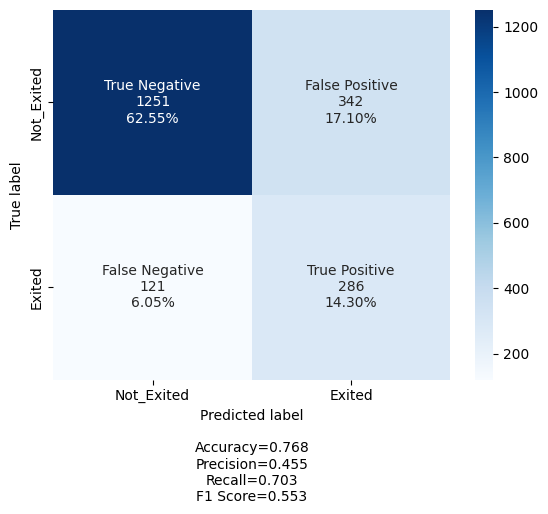

In [ ]:
cm_h = metrics.confusion_matrix(y_test, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


### Model Improvement: Neural Network model with balanced data
**Apply SMOTE to balance this dataset.**

In [ ]:
# Applying SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

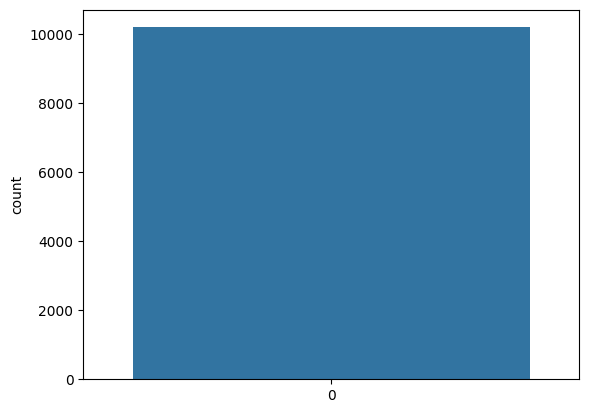

In [ ]:
sns.countplot(y_train['Exited'])

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_4 = Sequential()

# Adding the input layer with 32 neurons and relu as activation function
model_4.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Adding dropout with a rate of 0.2
model_4.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons and relu as activation function
model_4.add(Dense(16, activation='relu'))

# Adding dropout with a rate of 0.1
model_4.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons and relu as activation function
model_4.add(Dense(8, activation='relu'))

# Adding the output layer with sigmoid activation function as it's a binary classification problem
model_4.add(Dense(1, activation='sigmoid'))


In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Define early stopping as a callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fit the model on the training data, with batch size of 64, 100 epochs, and using the early stopping callback
history_4 = model_4.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7327 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7353 - val_loss: 0.5340 - val_accuracy: 0.7300
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7435 - val_loss: 0.5139 - val_accuracy: 0.7362

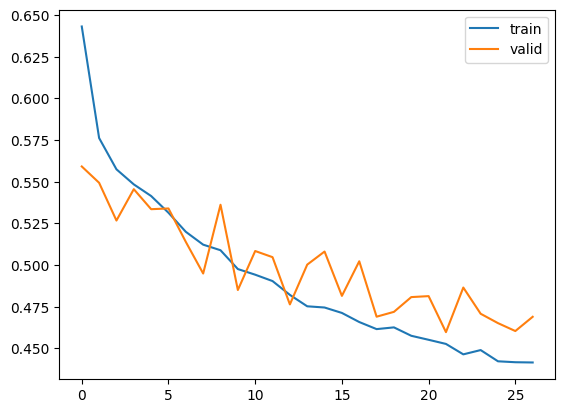

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

319/319 [==============================] - 0s 921us/step
Best Threshold=0.516103, G-Mean=0.821


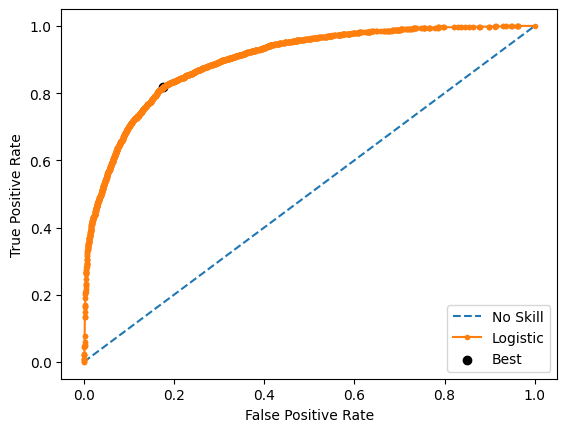

In [ ]:
## Predict probabilities on the train data
yhat = model_4.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


In [ ]:
## Obtain the predictions on X_val
y_pred_s = model_4.predict(X_test)
# Predicting the results using the tuned threshold
y_pred_s = (y_pred_s > thresholds[ix])
y_pred_s

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
cr=metrics.classification_report(y_test,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



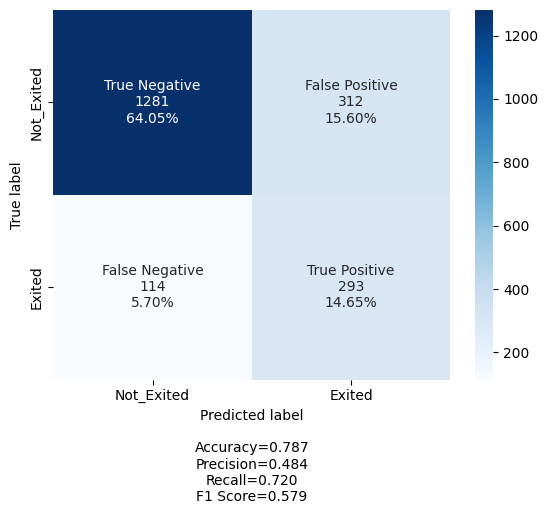

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_test, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model

319/319 [==============================] - 0s 938us/step
Best Threshold=0.516103, G-Mean=0.821


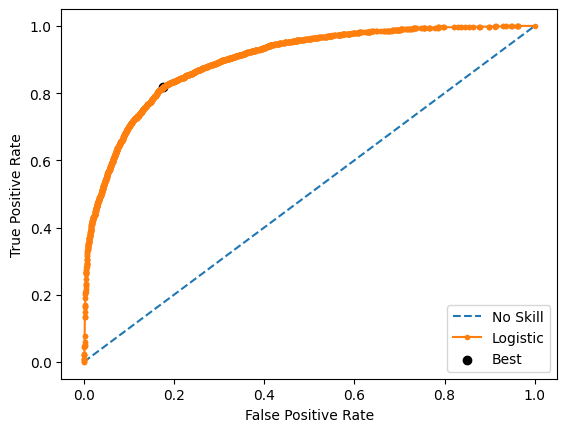

In [ ]:
# predict probabilities using the best model
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Predict the X_test data using the best model
y_pred_test = model_4.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



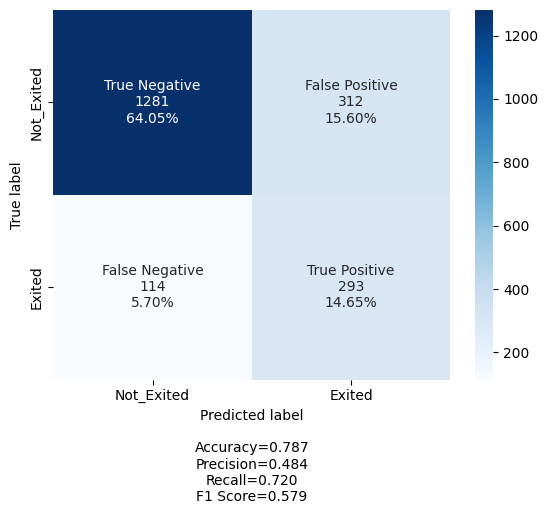

In [ ]:
cm_h = confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review its target market or review the strategy for retention between the different age groups.

* About the tenure, the clients on either end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure. Worryingly, the bank is losing customers with significant bank balances which are likely to hit their available capital for lending.

* The proportion of female customers churning is also greater than that of male customers.

Interestingly, the majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

* Unsurprisingly the inactive members have a greater churn.


Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group into active customers as this will have a positive impact on the customer churn.

___